<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/mushroom-classification">Classification des Champignons</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/champignon.jpg" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/schéma_champignon.jpg" width="512">
</div>


<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/73/mushroom">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [34]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, time
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
from matplotlib.colors import ListedColormap
from itertools import cycle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                            precision_score, recall_score, f1_score, fbeta_score, jaccard_score, \
                            precision_recall_curve, average_precision_score, balanced_accuracy_score, \
                            classification_report
from sklearn.metrics import roc_auc_score, zero_one_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, \
                                    RepeatedStratifiedKFold, LeavePOut, LeaveOneGroupOut, \
                                    LeavePGroupsOut, ShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit, GridSearchCV

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

from sklearn.neighbors  import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble   import IsolationForest
from sklearn.svm        import OneClassSVM

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

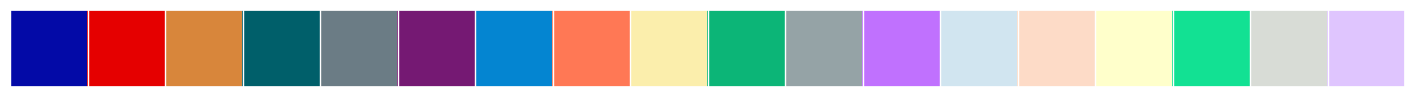

In [37]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [38]:
repertoireRacine  = '.'
nomProjet         = 'ClassificationDesChampignons'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

In [39]:
def formatPct(pct, allvals):
    total = int(round(pct/100. * np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, total)    

In [40]:
def affichageDistribution(colonne,couleur,ax):
    graph = sns.distplot(colonne, color=couleur, ax=ax)
    graph.set(ylabel=None)
    moyenne, mediane = float(colonne.mean()), \
                   float(colonne.median())
    
    ax.axvline(moyenne, color='g', linestyle='-', label="mean   = {0:0.1f}".format(moyenne), lw=2)
    ax.axvline(mediane, color='b', linestyle='--', label="median = {0:0.1f}".format(mediane), lw=2)
    graph.legend(loc="upper right")

In [41]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Classification Hiérarchique Ascendante')
        plt.xlabel('Villes ou (taille du cluster)')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>
<table>
    <CAPTION style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>mushrooms.csv</CAPTION>    
<tr>                                                                                   
     <th>
        <table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr>
        <tr>
            <th  style="text-align:left;color:red;font-style: italic">poisonous</th>               
            <th  style="text-align:left;color:red;font-style: italic">edible=e, poisonous=p</th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-shape</th>               
            <th  style="text-align:left">bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-cap-shape.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-surface</th>             
            <th  style="text-align:left">fibrous=f,grooves=g,scaly=y,smooth=s<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-cap-surface.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-color</th>               
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">bruises</th>                 
            <th  style="text-align:left">bruises=t,no=f</th>
        </tr>    
        <tr>
            <th  style="text-align:left">odor</th>                    
            <th  style="text-align:left">almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-attachment</th>         
            <th  style="text-align:left">attached=a,descending=d,free=f,notched=n<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-gill-attachment.png" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-spacing</th>            
            <th  style="text-align:left">close=c,crowded=w,distant=d<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-gill-spacing.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-size</th>               
            <th  style="text-align:left">broad=b,narrow=n</th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-color</th>              
            <th  style="text-align:left">black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-shape</th>             
            <th  style="text-align:left">enlarging=e,tapering=t</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-root</th>              
            <th  style="text-align:left">bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-stalk.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-surface-above-ring</th>
            <th  style="text-align:left">fibrous=f,scaly=y,silky=k,smooth=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-surface-below-ring</th>
            <th  style="text-align:left">fibrous=f,scaly=y,silky=k,smooth=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-color-above-ring</th>  
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-color-below-ring</th>  
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">veil-type</th>               
            <th  style="text-align:left">partial=p,universal=u</th>
        </tr>    
        <tr>
            <th  style="text-align:left">veil-color</th>              
            <th  style="text-align:left">brown=n,orange=o,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">ring-number</th>             
            <th  style="text-align:left">none=n,one=o,two=t</th>
        </tr>    
        <tr>
            <th  style="text-align:left">ring-type</th>               
            <th  style="text-align:left">cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-ring-type.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">spore-print-color</th>       
            <th  style="text-align:left">black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">population</th>              
            <th  style="text-align:left">abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">habitat</th>                 
            <th  style="text-align:left">grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d</th>
        </tr>    
        </table>
     </th>
     <th style="vertical-align: top"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/champignons_structure.jpeg" width="1024"></th>
 </tr>
</table>



In [42]:
dictValeurs = {}
dictValeurs['cible']                   ={'comestible':'e','toxique':'p'} 
dictValeurs['cap_shape']               ={'bell':'b','conical':'c','convex':'x','flat':'f','knobbed':'k','sunken':'s'}
dictValeurs['cap_surface']             ={'fibrous':'f','grooves':'g','scaly':'y','smooth':'s'}
dictValeurs['cap_color']               ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','green':'r','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
dictValeurs['bruises']                 ={'bruises':'t','no':'f'}
dictValeurs['odor']                    ={'almond':'a','anise':'l','creosote':'c','fishy':'y','foul':'f','musty':'m','none':'n','pungent':'p','spicy':'s'}
dictValeurs['gill_attachment']         ={'attached':'a','descending':'d','free':'f','notched':'n'}
dictValeurs['gill_spacing']            ={'close':'c','crowded':'w','distant':'d'}
dictValeurs['gill_size']               ={'broad':'b','narrow':'n'}
dictValeurs['gill_color']              ={'black':'k','brown':'n','buff':'b','chocolate':'h','gray':'g','green':'r','orange':'o','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
dictValeurs['stalk_shape']             ={'enlarging':'e','tapering':'t'}
dictValeurs['stalk_root']              ={'bulbous':'b','club':'c','cup':'u','equal':'e','rhizomorphs':'z','rooted':'r','missing':'?'}
dictValeurs['stalk_surface_above_ring']={'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
dictValeurs['stalk_surface_below_ring']={'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
dictValeurs['stalk_color_above_ring']  ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
dictValeurs['stalk_color_below_ring']  ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
dictValeurs['veil_type']               ={'partial':'p','universal':'u'}
dictValeurs['veil_color']              ={'brown':'n','orange':'o','white':'w','yellow':'y'}
dictValeurs['ring_number']             ={'none':'n','one':'o','two':'t'}
dictValeurs['ring_type']               ={'cobwebby':'c','evanescent':'e','flaring':'f','large':'l','none':'n','pendant':'p','sheathing':'s','zone':'z'}
dictValeurs['spore_print_color']       ={'black':'k','brown':'n','buff':'b','chocolate':'h','green':'r','orange':'o','purple':'u','white':'w','yellow':'y'}
dictValeurs['population']              ={'abundant':'a','clustered':'c','numerous':'n','scattered':'s','several':'v','solitary':'y'}
dictValeurs['habitat']                 ={'grasses':'g','leaves':'l','meadows':'m','paths':'p','urban':'u','waste':'w','woods':'d'}

def reverseDict(dictValeurs, dictRValeurs, dictNValeurs):
    for colonne in dictValeurs:
        dictRValeurs[colonne] =  { dictValeurs[colonne][cle]:cle for cle in dictValeurs[colonne]}
        dictNValeurs[colonne] =  { cle:i for i,cle in enumerate(dictValeurs[colonne])}

dictRValeurs,dictNValeurs = {},{}
reverseDict(dictValeurs, dictRValeurs, dictNValeurs)

In [43]:
dictNValeurs

{'cible': {'comestible': 0, 'toxique': 1},
 'cap_shape': {'bell': 0,
  'conical': 1,
  'convex': 2,
  'flat': 3,
  'knobbed': 4,
  'sunken': 5},
 'cap_surface': {'fibrous': 0, 'grooves': 1, 'scaly': 2, 'smooth': 3},
 'cap_color': {'brown': 0,
  'buff': 1,
  'cinnamon': 2,
  'gray': 3,
  'green': 4,
  'pink': 5,
  'purple': 6,
  'red': 7,
  'white': 8,
  'yellow': 9},
 'bruises': {'bruises': 0, 'no': 1},
 'odor': {'almond': 0,
  'anise': 1,
  'creosote': 2,
  'fishy': 3,
  'foul': 4,
  'musty': 5,
  'none': 6,
  'pungent': 7,
  'spicy': 8},
 'gill_attachment': {'attached': 0, 'descending': 1, 'free': 2, 'notched': 3},
 'gill_spacing': {'close': 0, 'crowded': 1, 'distant': 2},
 'gill_size': {'broad': 0, 'narrow': 1},
 'gill_color': {'black': 0,
  'brown': 1,
  'buff': 2,
  'chocolate': 3,
  'gray': 4,
  'green': 5,
  'orange': 6,
  'pink': 7,
  'purple': 8,
  'red': 9,
  'white': 10,
  'yellow': 11},
 'stalk_shape': {'enlarging': 0, 'tapering': 1},
 'stalk_root': {'bulbous': 0,
  'club':

In [44]:
donnees = pd.read_csv('../donnees/mushrooms.csv')
donnees.columns = ['cible']+[colonne.replace('-','_') for colonne in  donnees.columns[1:]]

In [45]:
for colonne in donnees.columns:
    donnees[colonne] = donnees[colonne].apply( lambda x : dictRValeurs[colonne][x])

In [46]:
donnees.sample(5)

cible cap_shape cap_surface cap_color  bruises     odor  \
3932     toxique      flat       scaly    yellow       no     foul   
1964  comestible      flat      smooth     white       no     none   
5169  comestible    convex       scaly     brown  bruises     none   
6813     toxique      flat      smooth       red       no    fishy   
909      toxique    convex      smooth     brown  bruises  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  \
3932            free        close     broad       gray  ...   
1964            free      crowded     broad  chocolate  ...   
5169            free        close     broad        red  ...   
6813            free        close    narrow       buff  ...   
909             free        close    narrow      white  ...   

     stalk_surface_below_ring stalk_color_above_ring stalk_color_below_ring  \
3932                    silky                   pink                   buff   
1964                  fibrous                  white                  white   
5169                   smooth                    red                  white   
6813                    silky                  white                  white   
909                    smooth                  white                  white   

     veil_type veil_color ring_number   ring_type spore_print_color  \
3932   partial      white         one       large         chocolate   
1964   partial      white         one  evanescent             brown   
5169   partial      white         two  evanescent             white   
6813   partial      white         one  evanescent             white   
909    partial      white         one     pendant             brown   

     population  habitat  
3932    several    woods  
1964   abundant  grasses  
5169  clustered    waste  
6813    several    paths  
909     several  grasses  

[5 rows x 23 columns]

In [47]:
for col in donnees.columns:
    print(f'{col:26s} {donnees[col].sort_values().nunique():4d} {donnees[col].sort_values().unique()}')

cible                         2 ['comestible' 'toxique']
cap_shape                     6 ['bell' 'conical' 'convex' 'flat' 'knobbed' 'sunken']
cap_surface                   4 ['fibrous' 'grooves' 'scaly' 'smooth']
cap_color                    10 ['brown' 'buff' 'cinnamon' 'gray' 'green' 'pink' 'purple' 'red' 'white'
 'yellow']
bruises                       2 ['bruises' 'no']
odor                          9 ['almond' 'anise' 'creosote' 'fishy' 'foul' 'musty' 'none' 'pungent'
 'spicy']
gill_attachment               2 ['attached' 'free']
gill_spacing                  2 ['close' 'crowded']
gill_size                     2 ['broad' 'narrow']
gill_color                   12 ['black' 'brown' 'buff' 'chocolate' 'gray' 'green' 'orange' 'pink'
 'purple' 'red' 'white' 'yellow']
stalk_shape                   2 ['enlarging' 'tapering']
stalk_root                    5 ['bulbous' 'club' 'equal' 'missing' 'rooted']
stalk_surface_above_ring      4 ['fibrous' 'scaly' 'silky' 'smooth']
stalk_surface_below

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Effacement d'une variable inutile</div></b>

In [48]:
donnees.drop(columns='veil_type',inplace=True)

In [49]:
donnees.sample(5)

cible cap_shape cap_surface cap_color  bruises   odor  \
1251  comestible    convex     fibrous     brown  bruises   none   
2908  comestible    convex     fibrous      gray  bruises   none   
6674     toxique      flat      smooth       red       no   foul   
7733     toxique   knobbed       scaly       red       no  spicy   
7709     toxique   knobbed       scaly       red       no  musty   

     gill_attachment gill_spacing gill_size gill_color  ...  \
1251            free        close     broad      brown  ...   
2908            free        close     broad       pink  ...   
6674            free        close    narrow       buff  ...   
7733            free        close    narrow       buff  ...   
7709        attached        close     broad     yellow  ...   

     stalk_surface_above_ring stalk_surface_below_ring stalk_color_above_ring  \
1251                   smooth                   smooth                  white   
2908                   smooth                   smooth                  white   
6674                   smooth                   smooth                   pink   
7733                    silky                    silky                  white   
7709                    silky                    scaly               cinnamon   

     stalk_color_below_ring veil_color ring_number   ring_type  \
1251                  white      white         one     pendant   
2908                  white      white         one     pendant   
6674                  white      white         one  evanescent   
7733                  white      white         one  evanescent   
7709               cinnamon      white        none        none   

     spore_print_color population habitat  
1251             brown    several   woods  
2908             black   solitary   woods  
6674             white    several  leaves  
7733             white    several   woods  
7709             white  clustered   woods  

[5 rows x 22 columns]

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Variables qualitatives</div></b>

In [50]:
qualitatives = donnees.columns[1:]
cible = 'cible'

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Statistiques descriptives et analyse de données</div></b>

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Chapeau</div></b>


In [51]:
affichage = donnees.groupby(['cible', 'cap_shape', 'cap_surface', 'cap_color']).agg({'cible':'count'}).rename(columns={'cible':'nombre'}).reset_index()

fig = go.Figure(px.treemap(affichage, 
                           path=[px.Constant("Chapeau"),'cible','cap_shape', 'cap_surface', 'cap_color'], values='nombre',
                           color='nombre', 
                           hover_data=['cible','cap_shape', 'cap_surface', 'cap_color'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=affichage['nombre'].mean(),
                 width=1152,
                 height=768
                ))
fig.show()

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lamelles</div></b>

In [52]:
affichage = donnees.groupby(['cible','gill_attachment','gill_spacing','gill_size','gill_color']).agg({'cible':'count'}).rename(columns={'cible':'nombre'}).reset_index()

fig = go.Figure(px.treemap(affichage, 
                           path=[px.Constant("Lamelles"),'cible','gill_attachment','gill_spacing','gill_size','gill_color'], values='nombre',
                           color='nombre', 
                           hover_data=['cible','gill_attachment','gill_spacing','gill_size','gill_color'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=affichage['nombre'].mean(),
                 width=1152,
                 height=768
                ))
fig.show()

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Pied</div></b>

In [53]:
affichage = donnees.groupby(['cible','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring']).agg({'cible':'count'}).rename(columns={'cible':'nombre'}).reset_index()

fig = go.Figure(px.treemap(affichage, 
                           path=[px.Constant("Pied"),'cible', 'stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring'], values='nombre',
                           color='nombre', 
                           hover_data=['cible','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=affichage['nombre'].mean(),
                 width=1152,
                 height=768
                ))
fig.show()

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Autres</div></b>

In [54]:
affichage = donnees.groupby(['cible','bruises','odor','veil_color','ring_number','ring_type','spore_print_color','population','habitat']).agg({'cible':'count'}).rename(columns={'cible':'nombre'}).reset_index()

fig = go.Figure(px.treemap(affichage, 
                           path=[px.Constant("Pied"),'cible','bruises','odor','veil_color','ring_number','ring_type','spore_print_color','population','habitat'], values='nombre',
                           color='nombre', 
                           hover_data=['cible','bruises','odor','veil_color','ring_number','ring_type','spore_print_color','population','habitat'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=affichage['nombre'].mean(),
                 width=1152,
                 height=768
                ))
fig.show()

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/echantillonApprentissageTest.png" width="800">

In [55]:
X = donnees[qualitatives].copy()
for colonne in X.columns:
    X[colonne] = X[colonne].apply(lambda x : dictNValeurs[colonne][x])
y = donnees[cible].apply(lambda x : dictNValeurs[cible][x])

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.4, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 
donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'test'
donnees.to_parquet(os.path.join(repertoireDonnees,'donnees_echantillons.parquet'))

In [57]:
donnees = pd.read_parquet(os.path.join(repertoireDonnees,'donnees_echantillons.parquet'))
X_train, X_test = X.loc[donnees['échantillon']=='apprentissage',:],\
                  X.loc[donnees['échantillon']=='test',:]
y_train, y_test = y[donnees['échantillon']=='apprentissage'],\
                  y[donnees['échantillon']=='test']

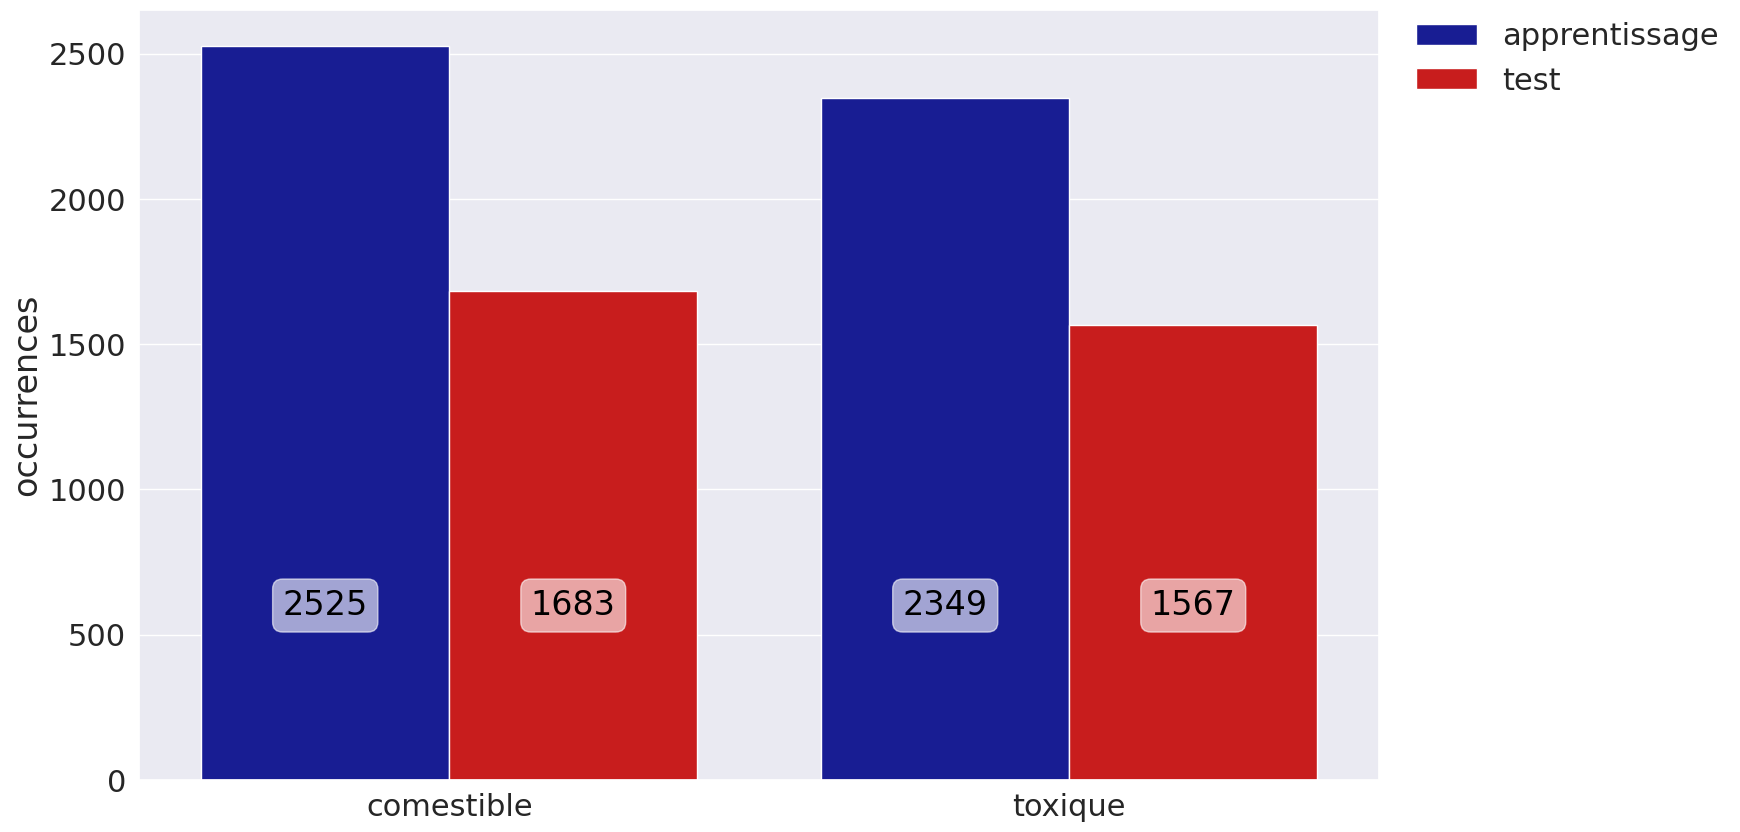

In [58]:
plt.figure(figsize=(16,10))
graph = sns.countplot(x='cible',
                      hue='échantillon',
                      data=donnees.sort_values(['cible','échantillon']), 
                      palette=palette[:2]
                     );

for i,nb in enumerate(donnees.groupby(['cible','échantillon']).cible.count()):
    if i%2 == 0 : val = i/2
    delta =  val - 0.2 +(i%2)*0.4
    graph.text(
                delta ,
                600,
                nb,
                color='black',
#                 rotation='vertical',
#                 size='large',
#                 fontsize='large',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

graph.set_ylabel('occurrences');
graph.set_xlabel('');
graph.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
sauvegarderImage('Distribution des champignons par type et échantillon')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Déclaration des classifieurs </div></b>

In [59]:
names = [
            'Random_Forest',
            'AdaBoost',
            # 'LightGBM',
            # 'XGBoost',
            'LogisticRegression',
            'Stochastic_GD',
            'Gaussian_Process',
            'Nearest_Neighbors',
            'Linear_SVM', 
            'Radial_NuSVM',
            'Poly_NuSVM',
            'GaussianNaiveBayes',
            'QuadraticDiscriminant',
            'Neural_Net'
        ]

arbres = 24
classifiers = [
            RandomForestClassifier(
                max_depth=6,
                max_features=3,
                min_samples_split=4,
                n_estimators=arbres,
                n_jobs=-1
            ),
            AdaBoostClassifier(
                n_estimators=arbres
            ),    
            # LGBMClassifier(
            #     learning_rate=0.1,
            #     n_estimators=arbres,
            #     num_leaves=20,
            #     reg_alpha=0.1,
            #     reg_lambda=20,
            #     min_child_samples = 10,
            #     min_split_gain = 0.01
            # ),
            # XGBClassifier(
            #     objective='binary:logistic',
            #     eval_metric='auc',
            #     n_estimators=arbres,
            #     max_depth=6,
            #     use_label_encoder=False
            # ),
            LogisticRegression(
                C=0.81113,
                max_iter=800,
                penalty='l2',
                solver='lbfgs',
                n_jobs=-1
            ),
            SGDClassifier(
                loss='log', 
                alpha=0.01, 
                max_iter=200, 
                fit_intercept=True
            ),
            GaussianProcessClassifier(
                n_jobs=-1
            ),
            KNeighborsClassifier(
                algorithm='ball_tree',
                n_neighbors=17,
                p=1,
                weights='distance',
                n_jobs=-1
            ),
            SVC(
                kernel="linear" , 
                C=0.025, 
                probability=True),
            NuSVC(
                kernel="rbf",
                gamma=0.5,
                nu=0.195,
                probability=True,
            ),
            NuSVC(
                kernel="poly",
                degree=3,
                nu=0.1,
                probability=True,
            ),
            GaussianNB(),
            QuadraticDiscriminantAnalysis(),
            MLPClassifier(
                alpha=1
            ),
        ]

classifieursDict = {name:clf for name, clf in zip(names, classifiers)}           

In [60]:
classifieursDict.pop('Stochastic_GD') #,classifieursDict.pop('QuadraticDiscriminant')

SGDClassifier(alpha=0.01, loss='log', max_iter=200)

In [61]:
classifieursDict

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=24, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=24),
 'LogisticRegression': LogisticRegression(C=0.81113, max_iter=800, n_jobs=-1),
 'Gaussian_Process': GaussianProcessClassifier(n_jobs=-1),
 'Nearest_Neighbors': KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=17, p=1,
                      weights='distance'),
 'Linear_SVM': SVC(C=0.025, kernel='linear', probability=True),
 'Radial_NuSVM': NuSVC(gamma=0.5, nu=0.195, probability=True),
 'Poly_NuSVM': NuSVC(kernel='poly', nu=0.1, probability=True),
 'GaussianNaiveBayes': GaussianNB(),
 'QuadraticDiscriminant': QuadraticDiscriminantAnalysis(),
 'Neural_Net': MLPClassifier(alpha=1)}

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Choix des classifieurs</div></b> 

In [68]:
def choixClassifieurs( classifieursDict, 
                       X_train, 
                       y_train,
                       X_test, 
                       y_test, 
                       couleurs = sns.hls_palette(len(classifieursDict.keys()), l=.4, s=.9),
                       nom_essai = 'initial'):
    np.random.seed(123456)
    t0 = time.time()  
    # h = .02  # step size in the mesh
    lw = 1

    plt.figure(figsize=(18,36))

    r_acc,r_aucROC = dict(),dict()
    fauxPositifs, vraisPositifs, probabilites = dict(),dict(),dict()
    accuracy,logloss,hammingloss,precision,sensibilite,f1,jaccard = dict(),dict(),dict(),dict(),dict(),dict(),dict()
    prec, rec, tauxPR, avgPrecRec =  dict(),dict(),dict(),dict()
    vrais_negatifs, faux_positifs, faux_negatifs, vrais_positifs = dict(),dict(),dict(),dict()

    for i, nom in enumerate(classifieursDict):    
        t1 = time.time()  
        classifieursDict[nom].fit(X_train, y_train)

        y_probas = classifieursDict[nom].predict_proba(X_test)
        y_pred = classifieursDict[nom].predict(X_test)
        fauxPositifs[nom], vraisPositifs[nom], probabilites[nom] = roc_curve(y_test.ravel(), y_probas[:, 1])

        r_aucROC[nom]     = auc(fauxPositifs[nom], vraisPositifs[nom])
        accuracy[nom]     = accuracy_score(y_test,y_pred)
        logloss[nom]      = log_loss(y_test,y_pred)
        hammingloss[nom]  = hamming_loss(y_test,y_pred)
        precision[nom]    = precision_score(y_test,y_pred)
        sensibilite[nom]  = recall_score(y_test,y_pred)
        f1[nom]           = f1_score(y_test,y_pred)
        jaccard[nom]      = jaccard_score(y_test,y_pred)


        vrais_negatifs[nom]        = confusion_matrix(y_test, y_pred)[0, 0]
        faux_positifs[nom]         = confusion_matrix(y_test, y_pred)[0, 1]
        faux_negatifs[nom]         = confusion_matrix(y_test, y_pred)[1, 0]
        vrais_positifs[nom]        = confusion_matrix(y_test, y_pred)[1, 1]        

        prec[nom], rec[nom], tauxPR[nom] = precision_recall_curve(y_test.ravel(), y_probas[:, 1])
        avgPrecRec[nom] = average_precision_score(y_test.ravel(), y_probas[:, 1])

        print(f'{nom:21s}'+(' %.4f' % accuracy[nom]).lstrip('0'),end='\t--\t')
        print ("Area under the ROC curve : %0.4f" % r_aucROC[nom],end='\t--\t')
        print('Exécution  :'+('%.2fs' % (time.time() - t1)).lstrip('0'))

        plt.subplot(2, 1, 1)
        plt.plot(fauxPositifs[nom], vraisPositifs[nom], color=couleurs[i], label=nom + '(AUC = %0.4f)' % r_aucROC[nom])

        plt.subplot(2, 1, 2)
        plt.step(rec[nom], prec[nom], where='post', color=couleurs[i], label=f"{nom}(AP = {avgPrecRec[nom]:0.8f})")#alpha=0.8, 
        plt.fill_between(rec[nom], prec[nom], step='post', alpha=0.05)



    plt.subplot(2, 1, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Le taux de faux Positifs-(1 - Spécificité) = VN / (FP + VN)',size=18)
    plt.ylabel('Le taux de vrais positifs-Sensibilité = VP / (VP + FN)',size=18)
    plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
    plt.legend(loc="lower right")    

    plt.subplot(2, 1, 2)
    f_scores = np.linspace(0.2, 0.9, num=7)
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    # plt.subplot(2, 1, 2)                
    # plt.plot([0, 1], [0.5, 0.5], 'k--')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Sensibilité(Rappel) = VP / (VP + FN)', size=18)
    plt.ylabel('Précision = VP / (VP + FP)', size=18)      
    plt.title('La courbe Précision-Rappel',size=20)
    plt.legend(loc="lower left")    

    sauvegarderImage("Les courbes ROC et Précision-Rappel")    
    plt.show()

    print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

    resultat = pd.DataFrame(pd.Series(r_aucROC), columns=["aucROC"])
    resultat['avgPrecRec']      = pd.Series(avgPrecRec   )
    resultat['accuracy']        = pd.Series(accuracy   )
    resultat['f1']              = pd.Series(f1         )
    resultat['precision']       = pd.Series(precision  )
    resultat['sensibilite']     = pd.Series(sensibilite)
    resultat['logloss']         = pd.Series(logloss    )
    resultat['hammingloss']     = pd.Series(hammingloss)
    resultat['jaccard']         = pd.Series(jaccard    )
    resultat["vrais_positifs"]  = pd.Series(vrais_positifs)
    resultat["vrais_negatifs"]  = pd.Series(vrais_negatifs)
    resultat["faux_positifs"]   = pd.Series(faux_positifs)
    resultat["faux_negatifs"]   = pd.Series(faux_negatifs)

    resultat['essai']           = nom_essai
    resultat                    = resultat.reset_index().rename(columns={'index':'Classifieur'}).set_index('Classifieur')
    
    resultat.sort_values('f1',ascending=False, inplace=True)
    return resultat

Random_Forest         0.9994	--	Area under the ROC curve : 1.0000	--	Exécution  :.16s
AdaBoost              0.9991	--	Area under the ROC curve : 1.0000	--	Exécution  :.05s
LogisticRegression    0.9594	--	Area under the ROC curve : 0.9806	--	Exécution  :.21s
Gaussian_Process      1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :8.27s
Nearest_Neighbors     1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.22s
Linear_SVM            0.9588	--	Area under the ROC curve : 0.9671	--	Exécution  :1.55s
Radial_NuSVM          0.9985	--	Area under the ROC curve : 1.0000	--	Exécution  :7.49s
Poly_NuSVM            0.9978	--	Area under the ROC curve : 1.0000	--	Exécution  :1.22s
GaussianNaiveBayes    0.8828	--	Area under the ROC curve : 0.9289	--	Exécution  :.01s
QuadraticDiscriminant 0.9975	--	Area under the ROC curve : 0.9971	--	Exécution  :.02s
Neural_Net            1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :1.54s


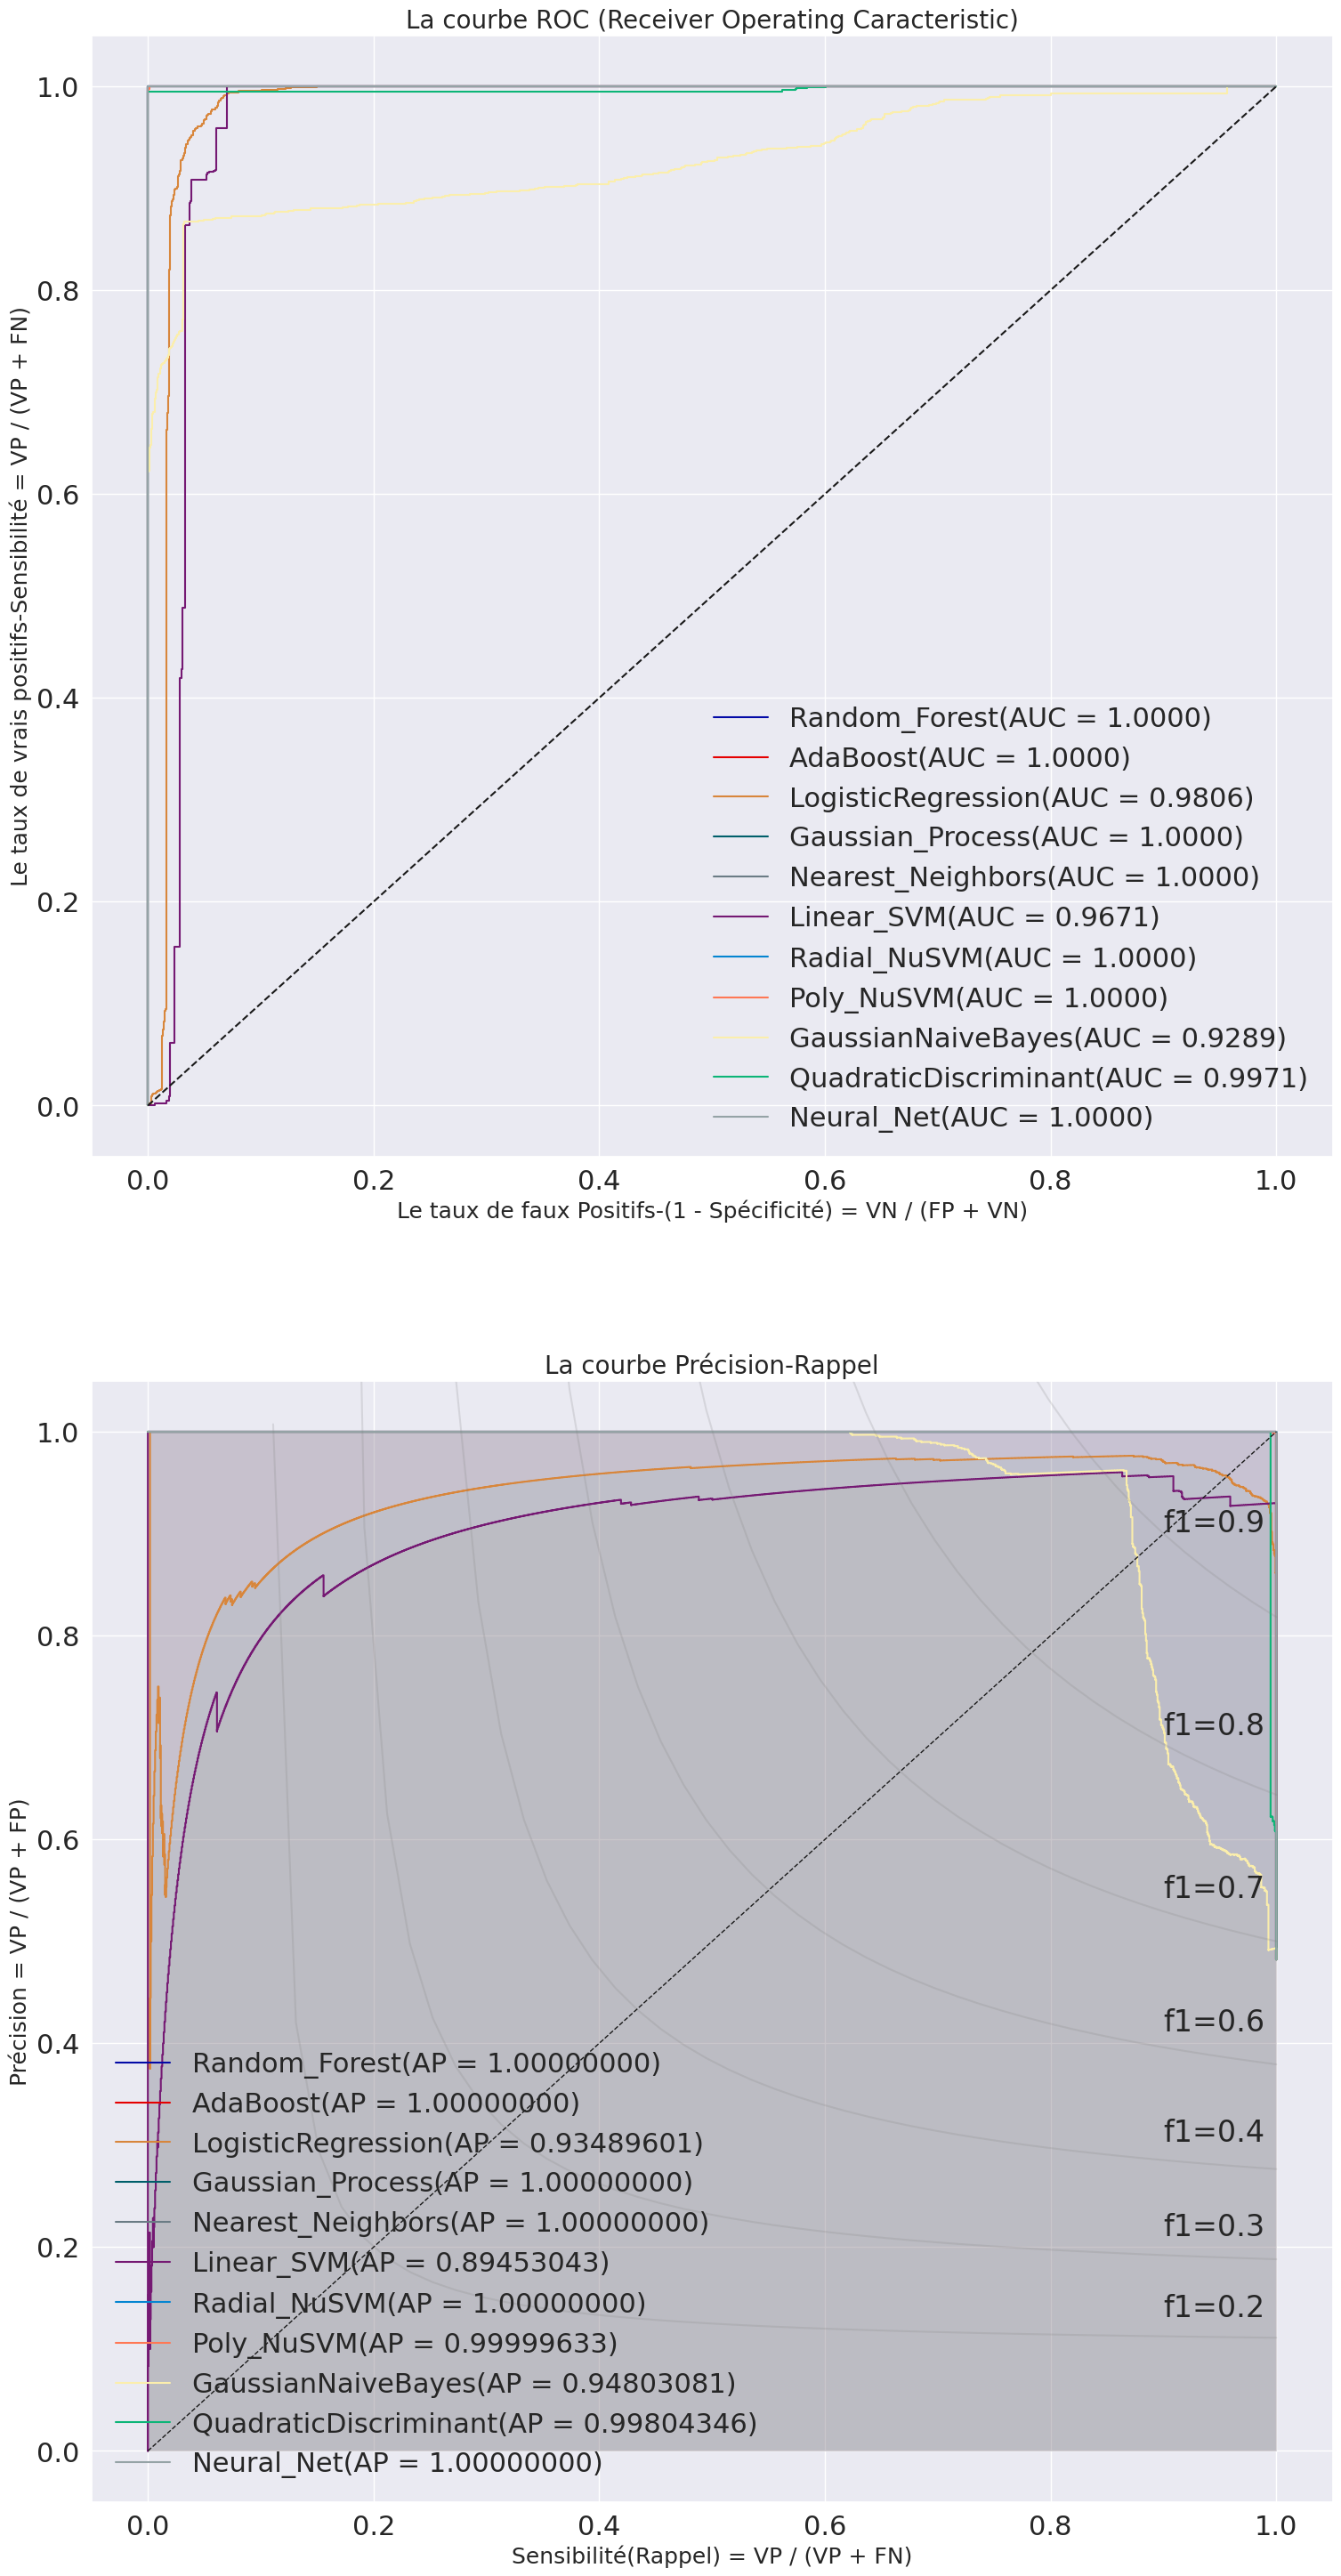

Exécution  :27.11s


In [69]:
resultats = choixClassifieurs(classifieursDict, X_train, y_train,X_test, y_test, couleurs = palette[:len(classifieursDict.keys())],nom_essai = 'initial')

In [70]:
resultats.sort_values('f1',ascending=False)

aucROC  avgPrecRec  accuracy        f1  precision  \
Classifieur                                                                  
Gaussian_Process       1.000000    1.000000  1.000000  1.000000   1.000000   
Nearest_Neighbors      1.000000    1.000000  1.000000  1.000000   1.000000   
Neural_Net             1.000000    1.000000  1.000000  1.000000   1.000000   
Random_Forest          1.000000    1.000000  0.999385  0.999361   1.000000   
AdaBoost               1.000000    1.000000  0.999077  0.999042   1.000000   
Radial_NuSVM           1.000000    1.000000  0.998462  0.998402   1.000000   
Poly_NuSVM             0.999997    0.999996  0.997846  0.997761   1.000000   
QuadraticDiscriminant  0.997052    0.998043  0.997538  0.997441   1.000000   
Linear_SVM             0.967072    0.894530  0.958769  0.958591   0.929299   
LogisticRegression     0.980555    0.934896  0.959385  0.958517   0.944272   
GaussianNaiveBayes     0.928947    0.948031  0.882769  0.878080   0.880616   

                       sensibilite       logloss  hammingloss   jaccard  \
Classifieur                                                               
Gaussian_Process          1.000000  2.220446e-16     0.000000  1.000000   
Nearest_Neighbors         1.000000  2.220446e-16     0.000000  1.000000   
Neural_Net                1.000000  2.220446e-16     0.000000  1.000000   
Random_Forest             0.998724  2.218071e-02     0.000615  0.998724   
AdaBoost                  0.998086  3.327106e-02     0.000923  0.998086   
Radial_NuSVM              0.996809  5.545177e-02     0.001538  0.996809   
Poly_NuSVM                0.995533  7.763248e-02     0.002154  0.995533   
QuadraticDiscriminant     0.994895  8.872284e-02     0.002462  0.994895   
Linear_SVM                0.989789  1.486108e+00     0.041231  0.920475   
LogisticRegression        0.973197  1.463927e+00     0.040615  0.920338   
GaussianNaiveBayes        0.875558  4.225425e+00     0.117231  0.782658   

                       vrais_positifs  vrais_negatifs  faux_positifs  \
Classifieur                                                            
Gaussian_Process                 1567            1683              0   
Nearest_Neighbors                1567            1683              0   
Neural_Net                       1567            1683              0   
Random_Forest                    1565            1683              0   
AdaBoost                         1564            1683              0   
Radial_NuSVM                     1562            1683              0   
Poly_NuSVM                       1560            1683              0   
QuadraticDiscriminant            1559            1683              0   
Linear_SVM                       1551            1565            118   
LogisticRegression               1525            1593             90   
GaussianNaiveBayes               1372            1497            186   

                       faux_negatifs    essai  
Classifieur                                    
Gaussian_Process                   0  initial  
Nearest_Neighbors                  0  initial  
Neural_Net                         0  initial  
Random_Forest                      2  initial  
AdaBoost                           3  initial  
Radial_NuSVM                       5  initial  
Poly_NuSVM                         7  initial  
QuadraticDiscriminant              8  initial  
Linear_SVM                        16  initial  
LogisticRegression                42  initial  
GaussianNaiveBayes               195  initial

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Transformation des modalités en variables</div></b> 

In [32]:
modelVect = DictVectorizer()
modelVect.fit(donnees[qualitatives].to_dict('records'))
X_qualitatives = modelVect.transform(donnees[qualitatives].to_dict('records'))
X = pd.DataFrame(X_qualitatives.toarray(), columns=modelVect.feature_names_).astype('int8')
y = donnees[cible].apply(lambda x : dictNValeurs[cible][x])

In [33]:
donnees = pd.read_parquet(os.path.join(repertoireDonnees,'donnees_echantillons.parquet'))
X_train, X_test = X.loc[donnees['échantillon']=='apprentissage',:],\
                  X.loc[donnees['échantillon']=='test',:]
y_train, y_test = y[donnees['échantillon']=='apprentissage'],\
                  y[donnees['échantillon']=='test']

Random_Forest         0.9969	--	Area under the ROC curve : 1.0000	--	Exécution  :.07s
AdaBoost              1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.08s
LogisticRegression    0.9991	--	Area under the ROC curve : 1.0000	--	Exécution  :.28s
Gaussian_Process      1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :10.17s
Nearest_Neighbors     1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.53s
Linear_SVM            0.9975	--	Area under the ROC curve : 0.9997	--	Exécution  :.73s
Radial_NuSVM          1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :9.86s
Poly_NuSVM            0.9985	--	Area under the ROC curve : 1.0000	--	Exécution  :1.80s
GaussianNaiveBayes    0.9468	--	Area under the ROC curve : 0.9923	--	Exécution  :.01s
QuadraticDiscriminant 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.03s
Neural_Net            0.9985	--	Area under the ROC curve : 1.0000	--	Exécution  :1.42s


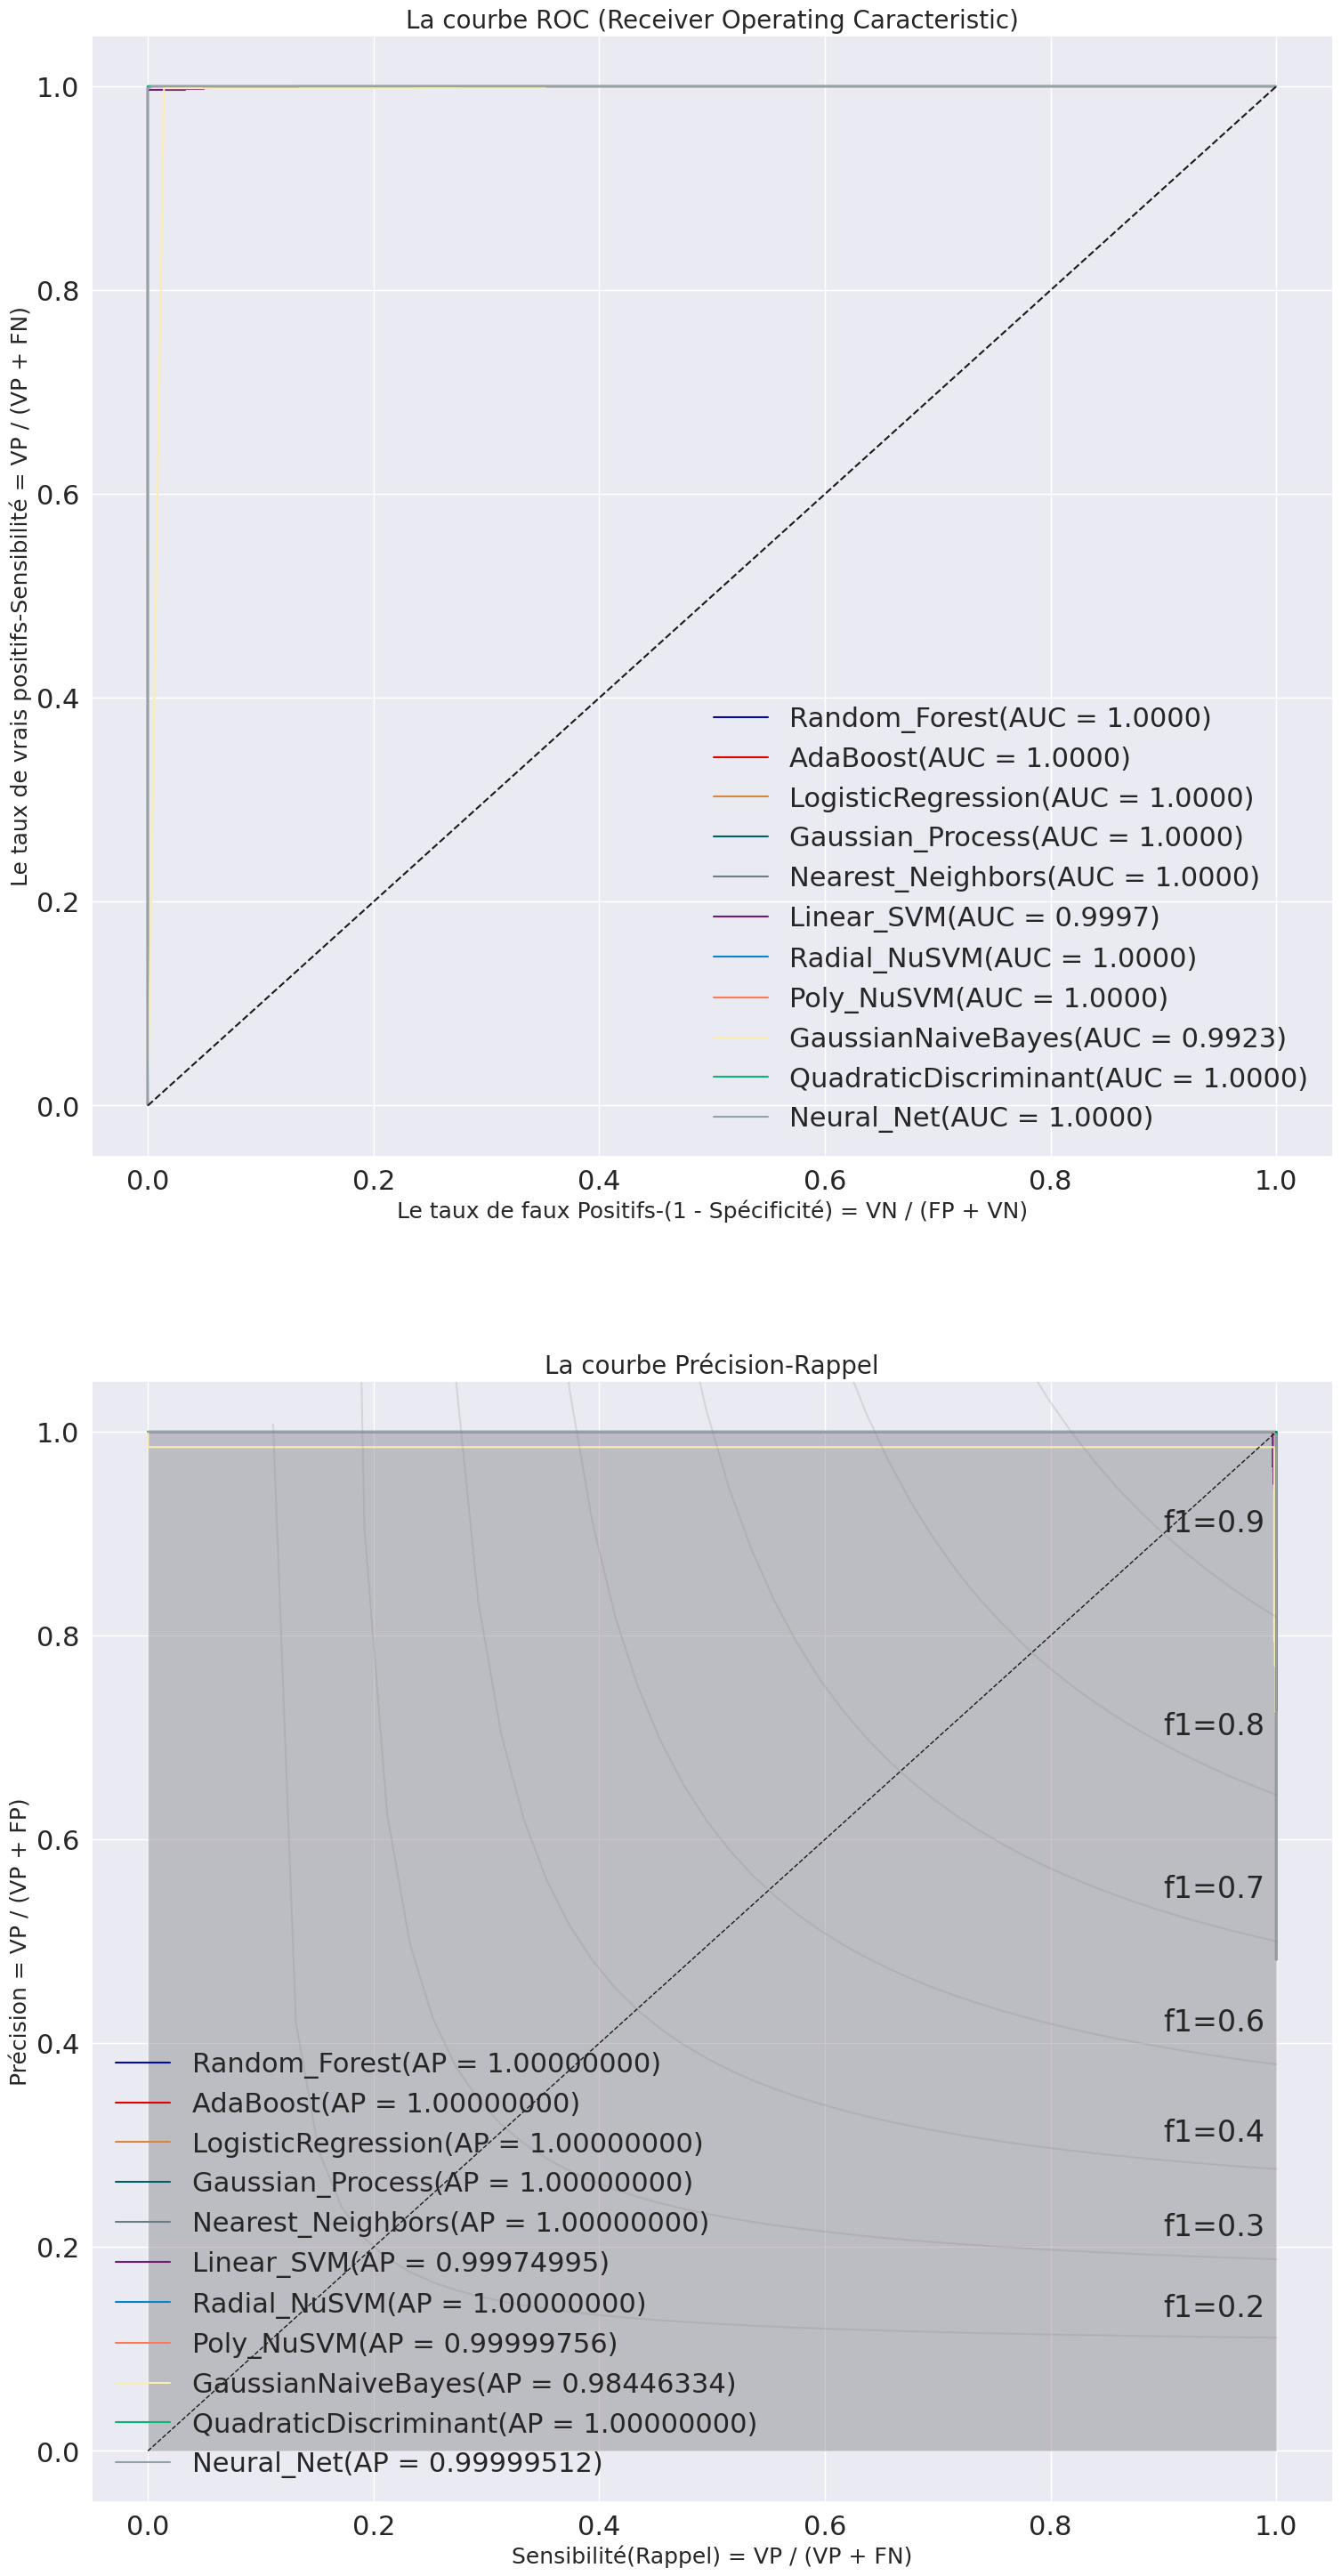

Exécution  :31.41s


In [34]:
resultatsTMV = choixClassifieurs(classifieursDict, X_train, y_train,X_test, y_test, couleurs = palette[:len(classifieursDict.keys())],nom_essai = 'modalites')

In [35]:
resultatsTMV.reset_index().sort_values('f1',ascending=False)

Classifieur    aucROC  avgPrecRec  accuracy        f1  \
0                AdaBoost  1.000000    1.000000  1.000000  1.000000   
1        Gaussian_Process  1.000000    1.000000  1.000000  1.000000   
2       Nearest_Neighbors  1.000000    1.000000  1.000000  1.000000   
3            Radial_NuSVM  1.000000    1.000000  1.000000  1.000000   
4   QuadraticDiscriminant  1.000000    1.000000  1.000000  1.000000   
5      LogisticRegression  1.000000    1.000000  0.999077  0.999042   
6              Poly_NuSVM  0.999998    0.999998  0.998462  0.998402   
7              Neural_Net  0.999995    0.999995  0.998462  0.998402   
8              Linear_SVM  0.999742    0.999750  0.997538  0.997441   
9           Random_Forest  1.000000    1.000000  0.996923  0.996799   
10     GaussianNaiveBayes  0.992329    0.984463  0.946769  0.947592   

    precision  sensibilite       logloss  hammingloss   jaccard      essai  
0    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
1    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
2    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
3    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
4    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
5    1.000000     0.998086  3.327106e-02     0.000923  0.998086  modalites  
6    1.000000     0.996809  5.545177e-02     0.001538  0.996809  modalites  
7    1.000000     0.996809  5.545177e-02     0.001538  0.996809  modalites  
8    1.000000     0.994895  8.872284e-02     0.002462  0.994895  modalites  
9    1.000000     0.993618  1.109035e-01     0.003077  0.993618  modalites  
10   0.901961     0.998086  1.918631e+00     0.053231  0.900403  modalites

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Uniquement variables quantitatives</div></b>

In [36]:
resultats = pd.concat([resultats.reset_index(),resultatsTMV.reset_index()])

In [37]:
resultats

Classifieur    aucROC  avgPrecRec  accuracy        f1  \
0        Gaussian_Process  1.000000    1.000000  1.000000  1.000000   
1       Nearest_Neighbors  1.000000    1.000000  1.000000  1.000000   
2              Neural_Net  1.000000    1.000000  1.000000  1.000000   
3           Random_Forest  1.000000    1.000000  0.999385  0.999361   
4                AdaBoost  1.000000    1.000000  0.999077  0.999042   
5            Radial_NuSVM  1.000000    1.000000  0.998462  0.998402   
6              Poly_NuSVM  0.999997    0.999996  0.997846  0.997761   
7   QuadraticDiscriminant  0.997052    0.998043  0.997538  0.997441   
8              Linear_SVM  0.967072    0.894530  0.958769  0.958591   
9      LogisticRegression  0.980555    0.934896  0.959385  0.958517   
10     GaussianNaiveBayes  0.928947    0.948031  0.882769  0.878080   
0                AdaBoost  1.000000    1.000000  1.000000  1.000000   
1        Gaussian_Process  1.000000    1.000000  1.000000  1.000000   
2       Nearest_Neighbors  1.000000    1.000000  1.000000  1.000000   
3            Radial_NuSVM  1.000000    1.000000  1.000000  1.000000   
4   QuadraticDiscriminant  1.000000    1.000000  1.000000  1.000000   
5      LogisticRegression  1.000000    1.000000  0.999077  0.999042   
6              Poly_NuSVM  0.999998    0.999998  0.998462  0.998402   
7              Neural_Net  0.999995    0.999995  0.998462  0.998402   
8              Linear_SVM  0.999742    0.999750  0.997538  0.997441   
9           Random_Forest  1.000000    1.000000  0.996923  0.996799   
10     GaussianNaiveBayes  0.992329    0.984463  0.946769  0.947592   

    precision  sensibilite       logloss  hammingloss   jaccard      essai  
0    1.000000     1.000000  2.220446e-16     0.000000  1.000000    initial  
1    1.000000     1.000000  2.220446e-16     0.000000  1.000000    initial  
2    1.000000     1.000000  2.220446e-16     0.000000  1.000000    initial  
3    1.000000     0.998724  2.218071e-02     0.000615  0.998724    initial  
4    1.000000     0.998086  3.327106e-02     0.000923  0.998086    initial  
5    1.000000     0.996809  5.545177e-02     0.001538  0.996809    initial  
6    1.000000     0.995533  7.763248e-02     0.002154  0.995533    initial  
7    1.000000     0.994895  8.872284e-02     0.002462  0.994895    initial  
8    0.929299     0.989789  1.486108e+00     0.041231  0.920475    initial  
9    0.944272     0.973197  1.463927e+00     0.040615  0.920338    initial  
10   0.880616     0.875558  4.225425e+00     0.117231  0.782658    initial  
0    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
1    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
2    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
3    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
4    1.000000     1.000000  2.220446e-16     0.000000  1.000000  modalites  
5    1.000000     0.998086  3.327106e-02     0.000923  0.998086  modalites  
6    1.000000     0.996809  5.545177e-02     0.001538  0.996809  modalites  
7    1.000000     0.996809  5.545177e-02     0.001538  0.996809  modalites  
8    1.000000     0.994895  8.872284e-02     0.002462  0.994895  modalites  
9    1.000000     0.993618  1.109035e-01     0.003077  0.993618  modalites  
10   0.901961     0.998086  1.918631e+00     0.053231  0.900403  modalites

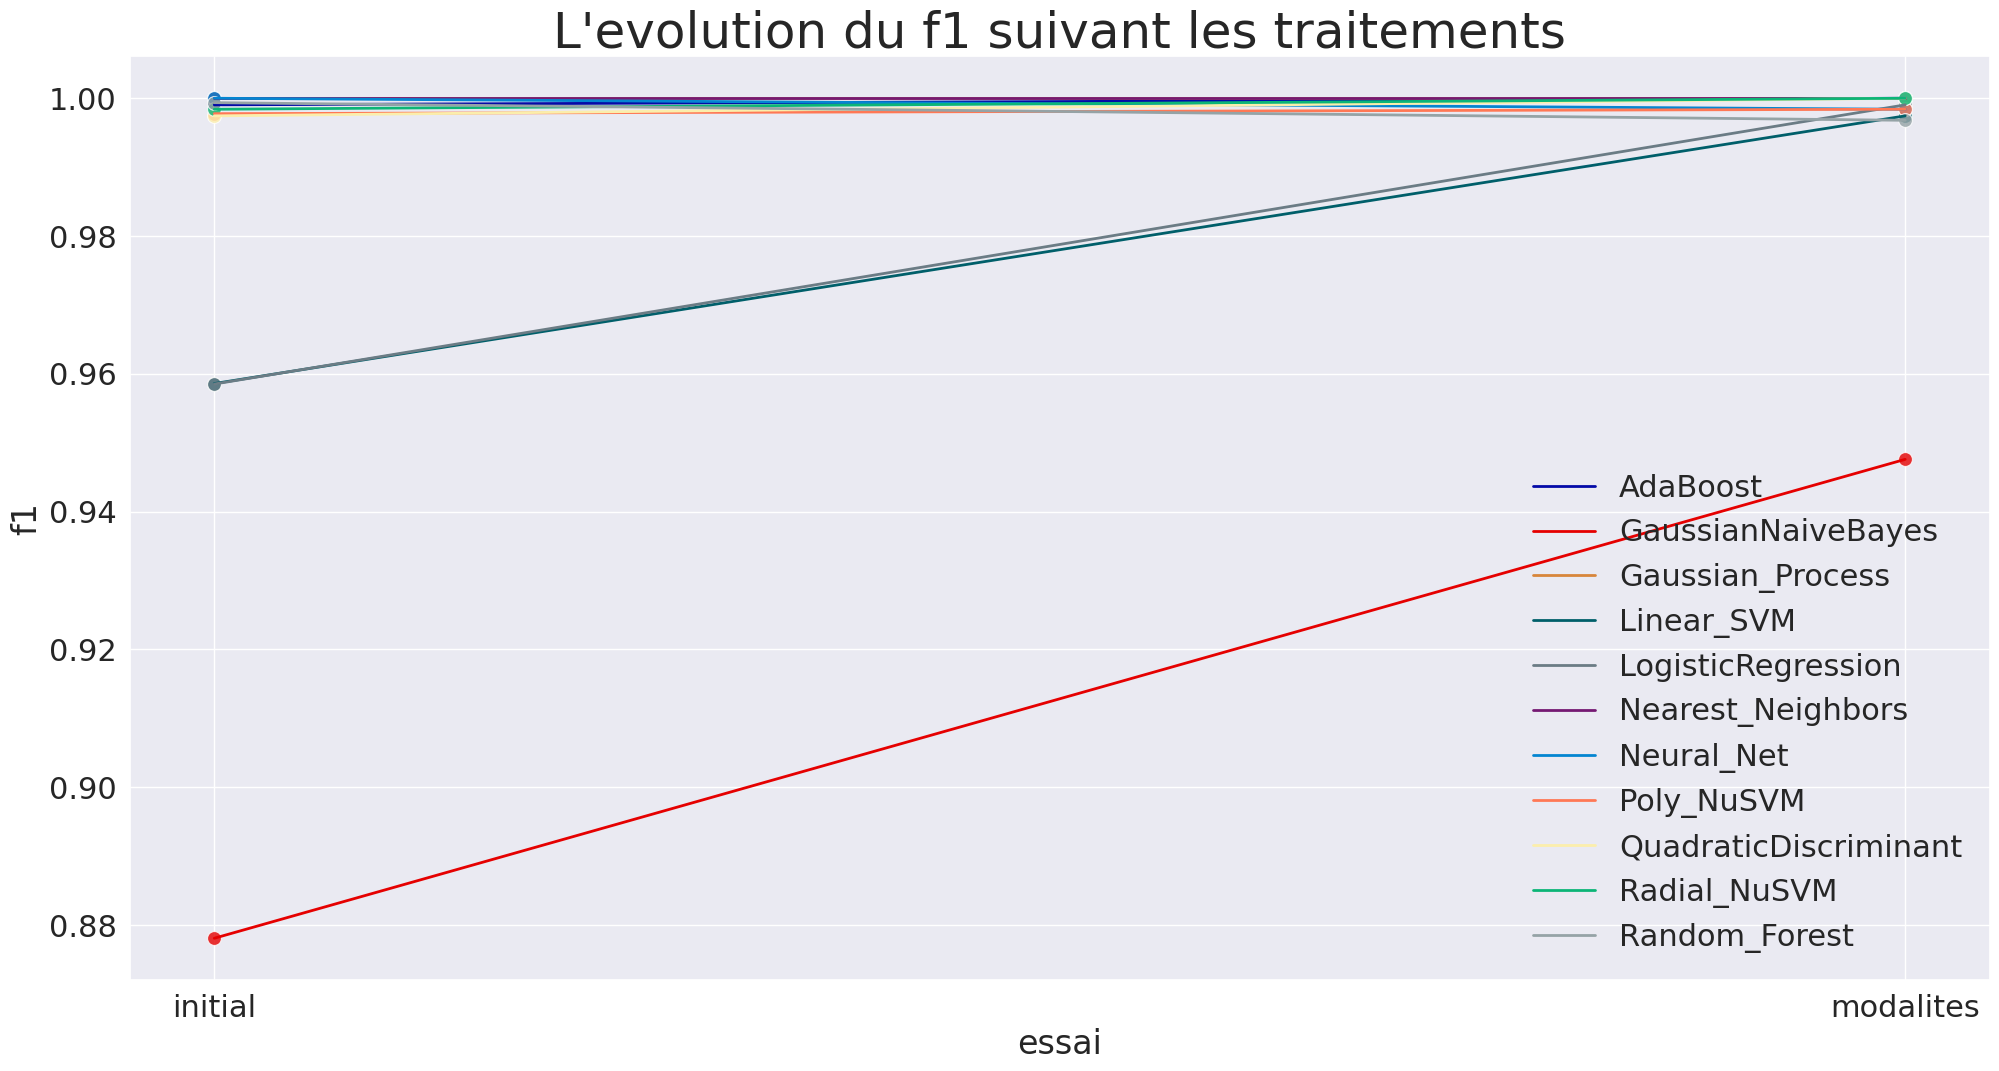

In [38]:
fig, ax = plt.subplots(figsize=(24,12))
for i, nom in enumerate(resultats['Classifieur'].sort_values().unique()):
    graph = sns.lineplot( x         = 'essai', 
                          y         = 'f1', 
                          data      = resultats[resultats.Classifieur == nom], 
                          estimator = None, 
                          lw        = 2, 
                          # ci        = None,
                          label     = nom,
                          color     = palette[i],
                          ax        = ax)
    sns.scatterplot( x     = 'essai', 
                     y     = 'f1', 
                     data  = resultats[resultats.Classifieur == nom], 
                     alpha = 0.8,   
                     s     = 100,
                     # ci    = None, 
                     color = palette[i],
                     ax    = ax,);
ax.set_title("L'evolution du f1 suivant les traitements",fontsize = 36);       